In [1]:
#import library
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

In [2]:
df=pd.read_csv("Steel_industry_data.csv")

In [3]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [4]:
df.tail(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35030,31/12/2018 21:45,3.42,0.00,13.36,0.0,100.00,24.80,78300,Weekday,Monday,Light_Load
35031,31/12/2018 22:00,3.42,0.00,13.07,0.0,100.00,25.31,79200,Weekday,Monday,Light_Load
35032,31/12/2018 22:15,3.24,3.38,0.22,0.0,69.20,99.77,80100,Weekday,Monday,Light_Load
35033,31/12/2018 22:30,3.67,4.43,0.00,0.0,63.80,100.00,81000,Weekday,Monday,Light_Load
35034,31/12/2018 22:45,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday,Light_Load
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [6]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [7]:
df.describe()[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh']]

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh
count,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949
std,33.444380,16.306000,7.424463
min,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000
50%,4.570000,5.000000,0.000000
75%,51.237500,22.640000,2.090000
max,157.180000,96.910000,27.760000


In [8]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [9]:
df.info

<bound method DataFrame.info of                    date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2) 

In [10]:
df.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


<ipython-input-13-f1b8480a792a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')


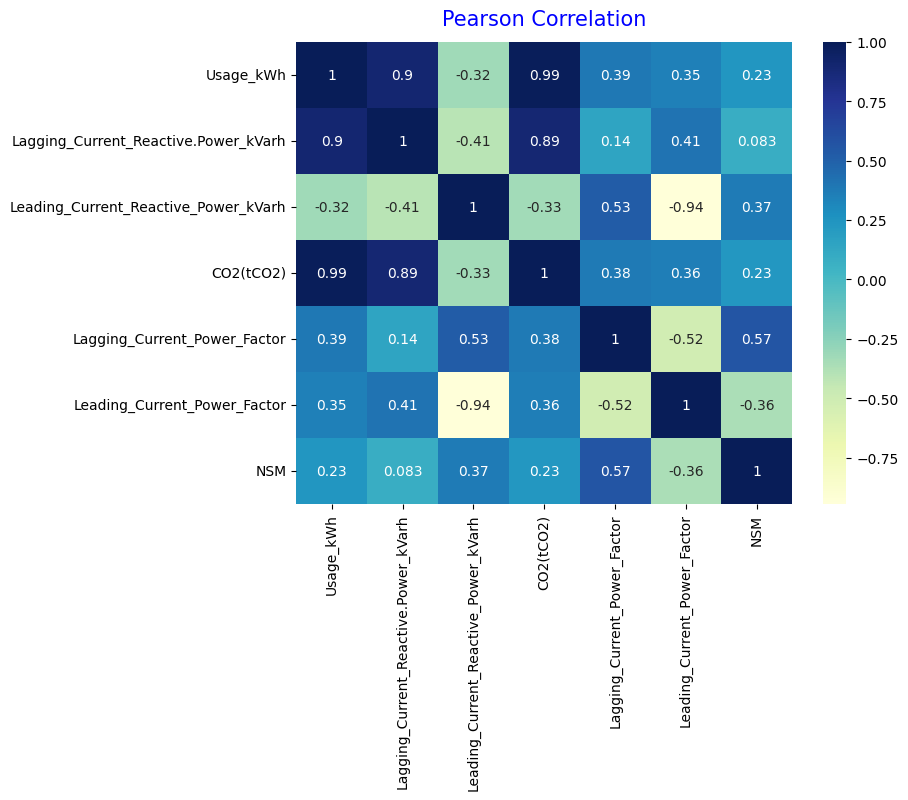

In [13]:
#visualize the correlation using pearson correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

In [14]:
#analyze the most energy consumption based on time
most_energy_consumption = pd.pivot_table(df, index = 'date', values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.max})
most_energy_consumption.head(10)

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
01/01/2018 01:15,3.82
01/01/2018 01:30,3.28
01/01/2018 01:45,3.60
01/01/2018 02:00,3.60


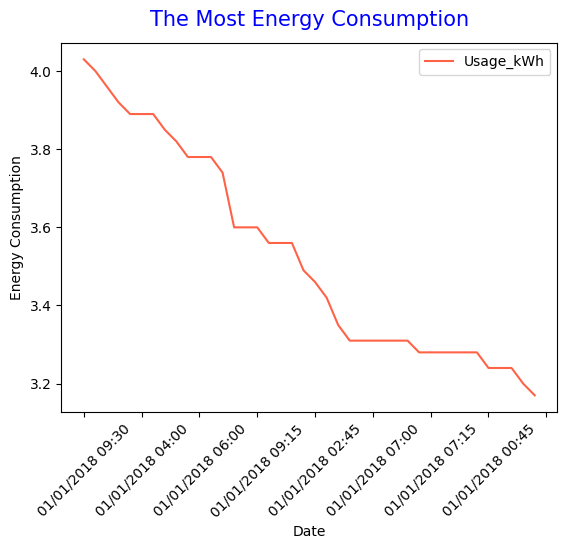

In [15]:
#visualize the most energy consumption on time
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'tomato')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'b', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

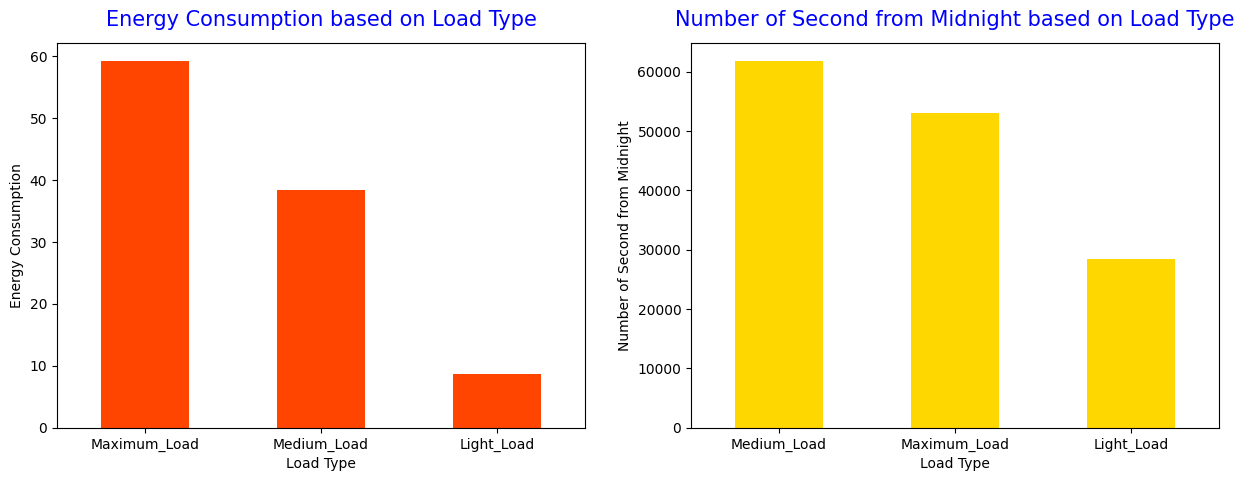

In [17]:
#visualize energy consumption based on load type
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

#visualize number of second from midnight based on load type
plt.subplot(1, 2, 2)
chart = df.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'gold')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()

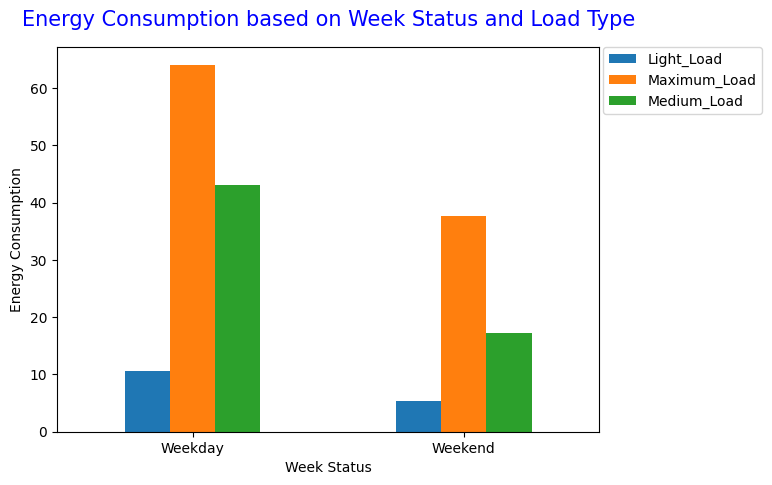

In [18]:
#visualize energy consumption based on week status and load type
plt.rcParams['figure.figsize'] = (7,5)
chart = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

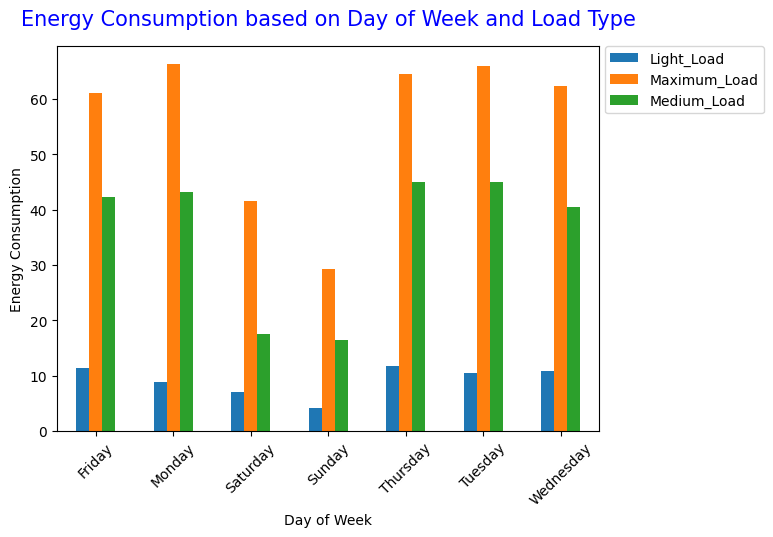

In [19]:
#visualize energy consumption based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

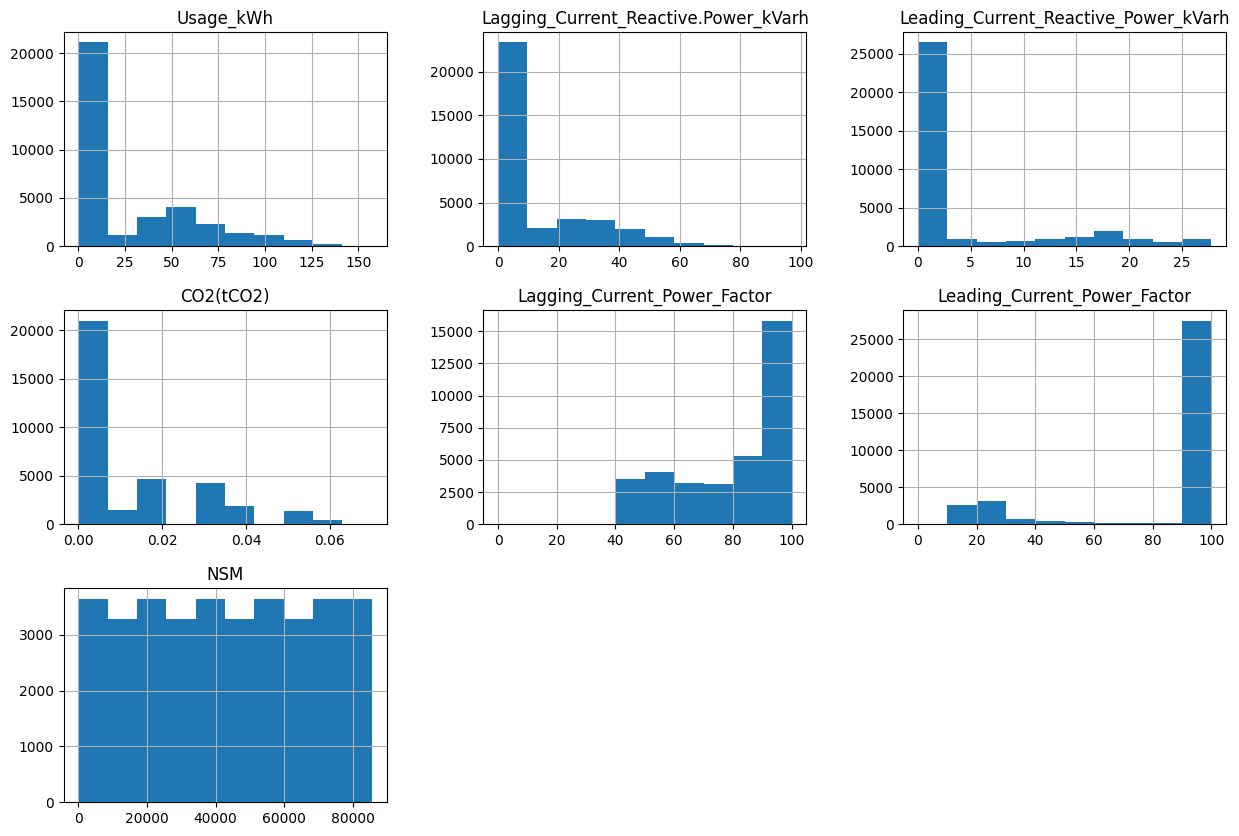

In [20]:
#distribution of each variable
df.hist(figsize = (15,10))
plt.show()

In [21]:
#indexing date
df = df.set_index('date')

#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [22]:
#split data
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24528, 15)
(24528,)
(10512, 15)
(10512,)


In [23]:
from sklearn.linear_model import LinearRegression
import time

# Assuming you have X_train, X_test, y_train, y_test defined

# Linear Regression Model
lr = LinearRegression()

# Measure the time taken to fit the model
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()

# Calculate the time taken for model fitting
fitting_time = end_time - start_time
print(f"Time taken for model fitting: {fitting_time:.4f} seconds")

# Calculate the R^2 score on the test set
r2_score = lr.score(X_test, y_test)
print(f"R^2 Score on Test Set: {r2_score:.4f}")


Time taken for model fitting: 0.2112 seconds
R^2 Score on Test Set: 0.9842


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have a trained linear regression model 'lr' and X_test, y_test defined

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 17.7694
Mean Absolute Error (MAE): 2.5519
R-squared (R²): 0.9842


In [31]:
import matplotlib.pyplot as plt
import plotly.express as px

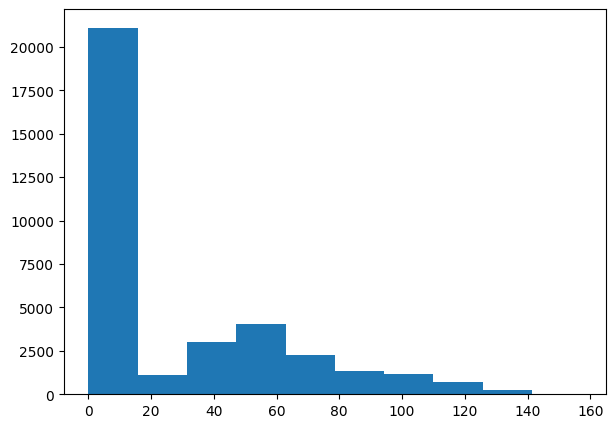

In [32]:
fig1 = plt.hist(df['Usage_kWh'])
#drawing histogram for Usage


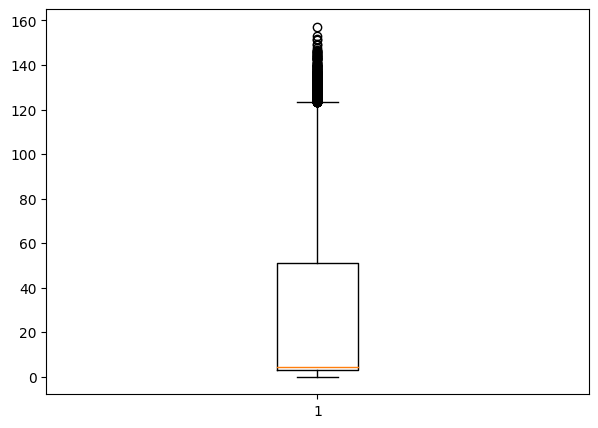

In [33]:
fig2 = plt.boxplot(df['Usage_kWh'])
#drawing boxplot for Usage


In [34]:
Q1=df.Usage_kWh.quantile(0.25)
Q3=df.Usage_kWh.quantile(0.75)
Q1,Q3



(3.2, 51.2375)

In [35]:
IQR=Q3-Q1
IQR

48.037499999999994

In [36]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit


(-68.85624999999999, 123.29374999999999)

In [37]:
column_name='Usage_kWh'
percentile_5 = df[column_name].quantile(0.05)
percentile_95 = df[column_name].quantile(0.95)
df[column_name] = df[column_name].apply(lambda x: percentile_5 if x < percentile_5 else (percentile_95 if x > percentile_95 else x))

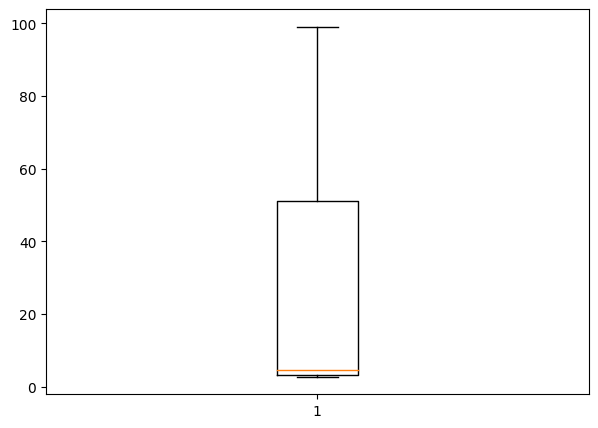

In [38]:
fig2 = plt.boxplot(df['Usage_kWh'])

In [39]:
df[(df.Usage_kWh>=upper_limit)]

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,


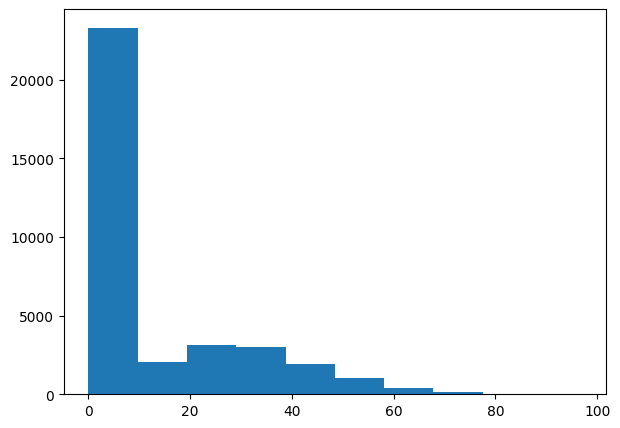

In [40]:
fig3 = plt.hist(df['Lagging_Current_Reactive.Power_kVarh'])

#drawing histogram for Lagging_Current_Reactive.Power_kVarh



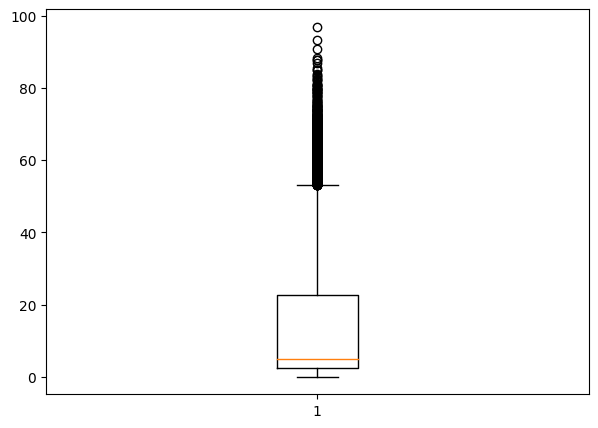

In [41]:

fig4 = plt.boxplot(df['Lagging_Current_Reactive.Power_kVarh'])

#drawing boxplot for Lagging_Current_Reactive.Power_kVarh

In [42]:
Q1=df['Lagging_Current_Reactive.Power_kVarh'].quantile(0.25)
Q3=df['Lagging_Current_Reactive.Power_kVarh'].quantile(0.75)



In [43]:
IQR=Q3-Q1
IQR


20.34

In [44]:

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


column_name='Lagging_Current_Reactive.Power_kVarh'
percentile_5 = df[column_name].quantile(0.05)
percentile_95 = df[column_name].quantile(0.95)
df[column_name] = df[column_name].apply(lambda x: percentile_5 if x < percentile_5 else (percentile_95 if x > percentile_95 else x))#outliers

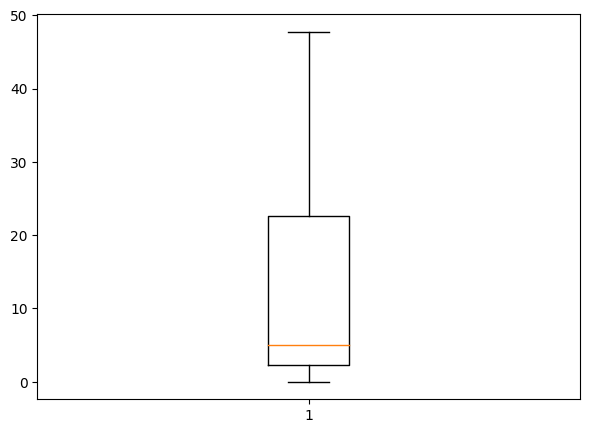

In [45]:
fig4 = plt.boxplot(df['Lagging_Current_Reactive.Power_kVarh'])


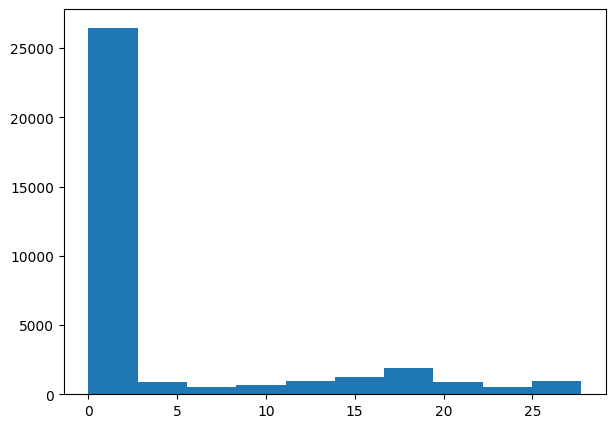

In [46]:
fig5 = plt.hist(df['Leading_Current_Reactive_Power_kVarh'])

#drawing histogram for Leading_Current_Reactive_Power_kVarh

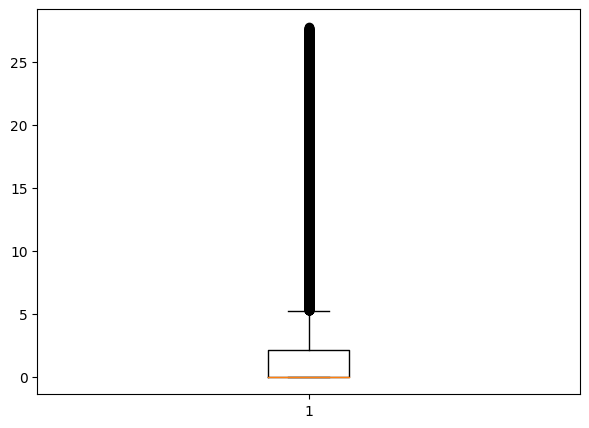

In [47]:
fig6 = plt.boxplot(df['Leading_Current_Reactive_Power_kVarh'])

#drawing boxplot for Leading_Current_Reactive_Power_kVarh




In [48]:
Q1=df.Leading_Current_Reactive_Power_kVarh.quantile(0.25)
Q3=df.Leading_Current_Reactive_Power_kVarh.quantile(0.75)




In [49]:
IQR=Q3-Q1


lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


column_name='Leading_Current_Reactive_Power_kVarh'
percentile_5 = df[column_name].quantile(0.05)
percentile_95 = df[column_name].quantile(0.95)
df[column_name] = df[column_name].apply(lambda x: percentile_5 if x < percentile_5 else (percentile_95 if x > percentile_95 else x))

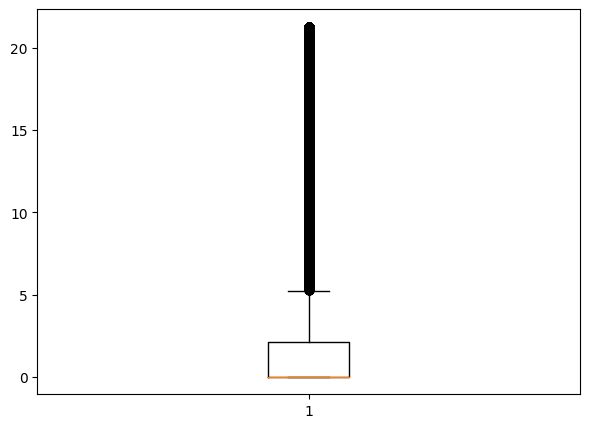

In [50]:
fig6 = plt.boxplot(df['Leading_Current_Reactive_Power_kVarh'])


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
import scipy
from scipy import stats

In [52]:
review = pd.DataFrame(df)
review
review['Usage_kWh']=stats.zscore(review['Usage_kWh'])
review['Lagging_Current_Reactive.Power_kVarh']=stats.zscore(review['Lagging_Current_Reactive.Power_kVarh'])
review['Lagging_Current_Reactive.Power_kVarh']=stats.zscore(review['Lagging_Current_Reactive.Power_kVarh'])
review['CO2']=stats.zscore(review['CO2(tCO2)'])
review['Lagging_Current_Power_Factor']=stats.zscore(review['Lagging_Current_Power_Factor'])
review['Leading_Current_Power_Factor']=stats.zscore(review['Leading_Current_Power_Factor'])
review['NSM']=stats.zscore(review['NSM'])
review
review.to_csv('standared.csv',index=False)
#file after standardalize

{'whiskers': [<matplotlib.lines.Line2D at 0x7bc614d57010>,
 'caps': [<matplotlib.lines.Line2D at 0x7bc614d57280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bc614d57970>],
 'medians': [<matplotlib.lines.Line2D at 0x7bc614d553f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bc614d55d20>],
 'means': []}

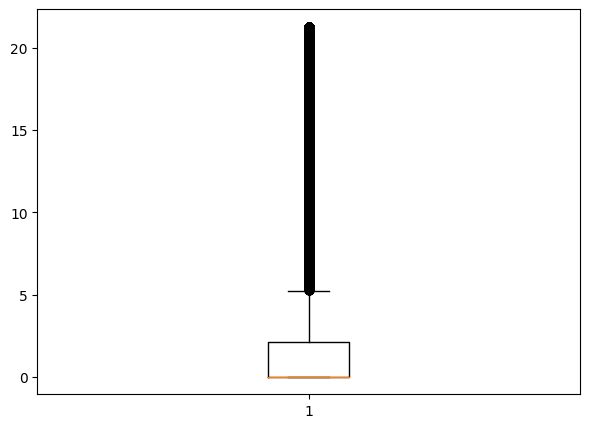

In [53]:
 plt.boxplot(review['Leading_Current_Reactive_Power_kVarh'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7bc660e65c60>,
 'caps': [<matplotlib.lines.Line2D at 0x7bc660e66c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bc61bb6ad40>],
 'medians': [<matplotlib.lines.Line2D at 0x7bc660e64820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bc660e66ce0>],
 'means': []}

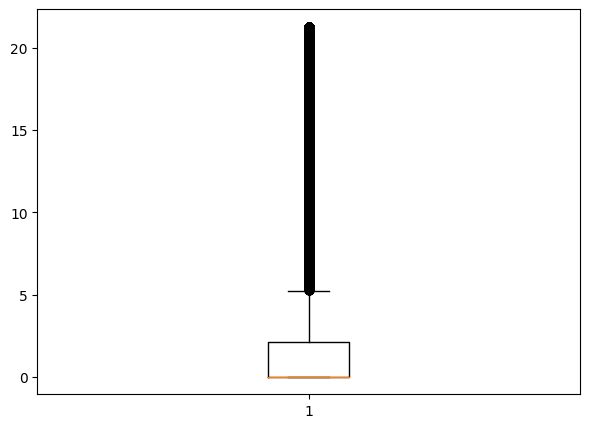

In [56]:
 plt.boxplot(df['Leading_Current_Reactive_Power_kVarh'])

In [57]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load,CO2
count,3.504000e+04,3.504000e+04,35040.000000,35040.000000,3.504000e+04,3.504000e+04,3.504000e+04,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,3.504000e+04
mean,2.271141e-17,-2.595590e-17,3.702660,0.011524,-4.801841e-16,-3.601381e-16,-4.055609e-19,0.284932,0.145205,0.142466,0.142466,0.142466,0.142466,0.142466,0.207534,0.276712,-5.840077e-17
std,1.000014e+00,1.000014e+00,6.963927,0.016151,1.000014e+00,1.000014e+00,1.000014e+00,0.451388,0.352313,0.349532,0.349532,0.349532,0.349532,0.349532,0.405547,0.447379,1.000014e+00
min,-7.575400e-01,-8.354884e-01,0.000000,0.000000,-4.258646e+00,-2.770147e+00,-1.714102e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.135502e-01
25%,-7.429770e-01,-6.826972e-01,0.000000,0.000000,-9.121087e-01,5.034174e-01,-8.570508e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.135502e-01
50%,-6.996045e-01,-5.033335e-01,0.000000,0.000000,3.901445e-01,5.132676e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.135502e-01
75%,7.778312e-01,6.685092e-01,2.090000,0.020000,9.748107e-01,5.132676e-01,8.570508e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.247945e-01
max,2.291200e+00,2.335927e+00,21.280000,0.070000,1.026473e+00,5.132676e-01,1.714102e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.620656e+00
